<a href="https://colab.research.google.com/github/AbrahamOtero/MLiB/blob/main/0_IntroductionToPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

##Pandas

The primary two components of pandas are the **Series** and **DataFrame**. A Series is essentially a column, and a DataFrame is a multi-dimensional table made up of a collection of Series.  A pandas Series is a one-dimensional array containing data of any type, including integer, float, string, boolean, python objects, etc. Each column of a DataFrames can be of a different data type:

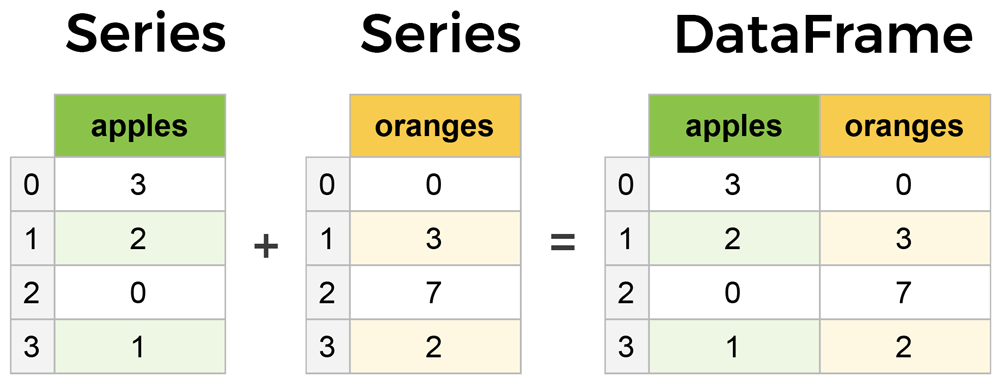

To begin working with pandas, import the pandas Python package as shown below. When importing pandas, the most common alias for pandas is **pd**.

In [1]:
import pandas as pd

Imagine we have a fruit stand selling apples and oranges. We want to create a DataFrame with a column for each fruit and a row for each customer purchase. To structure this data as a dictionary for Pandas, we could:

In [2]:
sales = {
    'apples': [3, 2, 0, 1],
    'oranges': [0, 3, 7, 2]
}

#Create a DataFrame from the above dictionary
df = pd.DataFrame(sales)

df

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


You can extract a single column using a square bracket **[ ]** with a column name in it. The output is a pandas Series object.

In [3]:
column = df['apples']

print('Extracted data:\n',column, sep='')

# What kind of data structure is it column?
print('\nData structure:', type (column))
# What types of data does the column structure contain within it?
print('\nData type contained in the data structure', column.dtype)

Extracted data:
0    3
1    2
2    0
3    1
Name: apples, dtype: int64

Data structure: <class 'pandas.core.series.Series'>

Data type contained in the data structure int64


You can extract multiple columns using a square bracket [[ ]] with the columns names in it. The output is a DataFmame object.

In [37]:
sales = {
    'apples': [3, 2, 0, 1],
    'oranges': [0, 3, 7, 2],
    'bananas': [0, 2, 10, 5]
}

# Create a DataFrame from the above dictionary
df = pd.DataFrame(sales)

# Extract  the apples and bananas columns
two_columns = df[['apples','bananas']]

print('Extracted data:\n',two_columns, sep='')

# What kind of data structure is it column?
print('\nData structure:', type (two_columns))


Extracted data:
   apples  bananas
0       3        0
1       2        2
2       0       10
3       1        5

Data structure: <class 'pandas.core.frame.DataFrame'>


The **index** of a DataFrame is a series of labels that identify each row. The labels can be integers, strings, or any other hashable type. The index is used for label-based access, and can be accessed or modified using this attribute. The Index of of our DaraFrame was created automatically and is made by the numbers 0-3:

In [38]:
print(df.index)
print(df.index.dtype)

RangeIndex(start=0, stop=4, step=1)
int64


A single row can be fetched by passing in a boolean series with one True value. In the example below, the second row with index = 1 is returned. Here, index returns the row labels of the DataFrame, and the comparison turns that into a Boolean one-dimensional array.

In [40]:
print(df[df.index==1])
# To better understand what it does df.index==1 deos
print('\n', df.index==1)

   apples  oranges  bananas
1       2        3        2

 [False  True False False]


We can specify and index when we initialize the DataFrame. Let's create an index for a DataFrame that consists of text, instead of integers:

In [41]:
sales = {
    'apples': [3, 2, 0, 1],
    'oranges': [0, 3, 7, 2],
    'bananas': [0, 2, 10, 5]
}

#Create a DataFrame from the above dictionary specifying the index
df  = pd.DataFrame(sales, index=['First', 'Second', 'Third', 'Fourth'])

print(df)
print('\n', df[df.index=='Second'])

        apples  oranges  bananas
First        3        0        0
Second       2        3        2
Third        0        7       10
Fourth       1        2        5

         apples  oranges  bananas
Second       2        3        2


##Loading ans saving files

We can save a DataFrame to multiple formats using the **to_format** methods, where format depends on the specific format we want to generate.

If you are running this from Collab, you should be aware that Collab runtimes expire when they are inactive for a long time and **any files generated can be lost when the evironment expires**. If you want to keep files generated from Collab, you will need to download them using the file menue of the left menu bar.

In [8]:
#Save to a csv file
df.to_csv('sales.csv')
#Save to a json file
df.to_json('sales.json')
#Save to an xlsx file
df.to_excel('sales.xlsx')

We're going to load a dataset of patients with diabetes. We could load it from a directory on our local computer, or in Collab. However, for simplicity of execution, let's load it from a URL that points to the GitHub repository where this code is located.

In [42]:
url = 'https://raw.githubusercontent.com/AbrahamOtero/MLiB/main/datasets/diabetes.csv'

diabetes = pd.read_csv(url)

# Display the first rows of the DataFrame
print(diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In the repository we have a version of the dataset in Excel format:

In [43]:
url = 'https://raw.githubusercontent.com/AbrahamOtero/MLiB/main/datasets/diabetes.xlsx'

diabetes = pd.read_excel(url)

# Display the first rows of the DataFrame
print(diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age          Outcome  
0                     0.627   50  tested_positive  
1                     0.351   31  tested_negative  
2                     0.672   32  tested_positive  
3                     0.167   21  tested_negative  
4                     2.288   33  tested_positive  


In the repository there is also a version of the data set in Excel format with multiple sheets; when loading it we can indicate which sheet we want to load.

In [44]:
url = 'https://raw.githubusercontent.com/AbrahamOtero/MLiB/main/datasets/diabetes_multi.xlsx'

diabetes_sheet_0 = pd.read_excel(url, sheet_name=0)

# Display the first rows of the DataFrame
print(diabetes_sheet_0.head())

#Let us load the second sheet
diabetes_sheet_1 = pd.read_excel(url, sheet_name=1)

# Display the first rows of the DataFrame
print(diabetes_sheet_1.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age          Outcome  
0                     0.627   50  tested_positive  
1                     0.351   31  tested_negative  
2                     0.672   32  tested_positive  
3                     0.167   21  tested_negative  
4                     2.288   33  tested_positive  
   inst#  preg   plas  pres  skin   insu  mass   pedi   age            class  \
0    1.0   6.0  148.0  72.0  35.0    0.0  33.6  0.627  50.0  tested_positive   
1    2.0   1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0  tested_negative   
2    3.0   8.0 

##Inspecting the contents of a DataFrame

Let's start by loading the diabetes dataset

In [12]:
url = 'https://raw.githubusercontent.com/AbrahamOtero/MLiB/main/datasets/diabetes.csv'

diabetes = pd.read_csv(url)

You can view the first few or last few rows of a DataFrame using the **head()** or **tail()** methods, respectively. You can specify the number of rows through the n argument (the default value is 5).

In [13]:
# Display the first rows of the DataFrame
print(diabetes.head())

# Display the last rows of the DataFrame
print(diabetes.tail())

# Display the first 3 rows of the DataFrame
print(diabetes.head(3))

# Display the last rows of the DataFrame
print(diabetes.tail(3))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766    

The number of rows and columns in a DataFrame can be determined using its **shape** attribute. This attribute returns a tuple containing the number of rows and columns (in that order). You can access the number of rows or columns individually by indexing the tuple. We can see that the diabetes dataset has 768 rows (instances) and 9 columns (features).

In [14]:
print (diabetes.shape)
print ('Number of rows:', diabetes.shape[0])
print ('Number of columns:', diabetes.shape[1])


(768, 9)
Number of rows: 768
Number of columns: 9


The *info()* method is a quick way to look at the data types, missing values (Non-Null Count), and data size of a DataFrame. We’re also getting memory_usage information.

In [15]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The **columns** attribute returns the column names in the form of an Index object.

In [45]:
 diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

We can select a single column using a square bracket **[ ]** with a column name in it. The output is a pandas Series object. We can also provide a list of column names inside the square brackets (**[[]]**) to fetch more than one column.

In [17]:
print(diabetes['Outcome'].head())

print(diabetes[['Pregnancies', 'Age', 'Outcome']].head())

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64
   Pregnancies  Age  Outcome
0            6   50        1
1            1   31        0
2            8   32        1
3            1   21        0
4            0   33        1


A single row can be selected by specifying a boolean series with one True value; in the example below these lines the series will only take the value True for position 1:

In [18]:
diabetes[diabetes.index==1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0


Several rows can be selected using the **isin()** method instead of a == operator. The following code selects rows between 5 (including) and up to 10 (excluding):

In [19]:
diabetes[diabetes.index.isin(range(5,10))]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


We can select rows by labels or conditions using **loc[]** and **iloc[]** ("location" and "integer location"). loc[] uses an index label (which may or may not be a number) to point to a row, column or cell, whereas iloc[] uses the numeric position. The index of the diabetes Dataframe goes from o to 768:

In [20]:
diabetes.index

RangeIndex(start=0, stop=768, step=1)

To understand the difference between loc[] and iloc[], let us modify the index to go from 1 to 769:

In [21]:
# We modified the index so that it starts at 1 instead of 0
diabetes.index = range(1,769)
diabetes.index

RangeIndex(start=1, stop=769, step=1)

The index in loc [] represents the row index (label), whereas the in iloc[] is the row position (number). Row positions start counting at 0, so row 1 will be the second. The default index also starts counting at 0, but we have altered it to start counting at 1. Therefore, when accessing with loc[1] (index) we will be accessing the first row, while when accessing with .iloc[1] (position) we will be accessing the second row.

In [22]:
print (diabetes.head(3))
print('\n\nBy index\n',diabetes.loc[1])
print('\n\nBy position:\n',diabetes.iloc[1])

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1            6      148             72             35        0  33.6   
2            1       85             66             29        0  26.6   
3            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
1                     0.627   50        1  
2                     0.351   31        0  
3                     0.672   32        1  


By index
 Pregnancies                   6.000
Glucose                     148.000
BloodPressure                72.000
SkinThickness                35.000
Insulin                       0.000
BMI                          33.600
DiabetesPedigreeFunction      0.627
Age                          50.000
Outcome                       1.000
Name: 1, dtype: float64


By position:
 Pregnancies                  1.000
Glucose                     85.000
BloodPressure               66.000
SkinThickness               29.000
Insulin            

We can also select multiple rows by providing a range in square brackets. In this case it should be noted that when using indices (loc[]) all the rows corresponding to the indicated indices will be returned, while when using positions (iloc[]) the last position is excluded:

In [23]:
# returns 3 rows, the ones corrsponding with indexes 1, 2 and 3
print(diabetes.loc[1:3])
# returns 2 rows, the ones corrsponding with positions 1 and 2 (index 2 and 3).
print(diabetes.iloc[1:3])

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1            6      148             72             35        0  33.6   
2            1       85             66             29        0  26.6   
3            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
1                     0.627   50        1  
2                     0.351   31        0  
3                     0.672   32        1  
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2            1       85             66             29        0  26.6   
3            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
2                     0.351   31        0  
3                     0.672   32        1  


We can also select specific columns along with rows. Again, iloc[] requires column position and loc[] column labels:

In [24]:
# Selects the indexes between 1 and 3 (included), and the columns indicated in text
print(diabetes.loc[1:3, ['Pregnancies', 'Glucose', 'BloodPressure']])
# Selects the positions between 1 and 3 (excluded), and the columns between 0 and 3 (exluded)
print('\n\n',diabetes.iloc[1:3, 0:3])
# Has the same effect as the previous statement; it selects columns up to column 3
print('\n\n',diabetes.iloc[1:3, :3])
# Selects all columns
print('\n\n',diabetes.iloc[1:3, :])
# Selects  rows up to the 5 position (excluded) and all the columns
print('\n\n',diabetes.iloc[:5, :])

   Pregnancies  Glucose  BloodPressure
1            6      148             72
2            1       85             66
3            8      183             64


    Pregnancies  Glucose  BloodPressure
2            1       85             66
3            8      183             64


    Pregnancies  Glucose  BloodPressure
2            1       85             66
3            8      183             64


    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2            1       85             66             29        0  26.6   
3            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
2                     0.351   31        0  
3                     0.672   32        1  


    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1            6      148             72             35        0  33.6   
2            1       85             66             29        0  26.6   
3            8      183          

If we use negative indices they start indexing from the end. The following image illustrates how positive and negative indexing works:
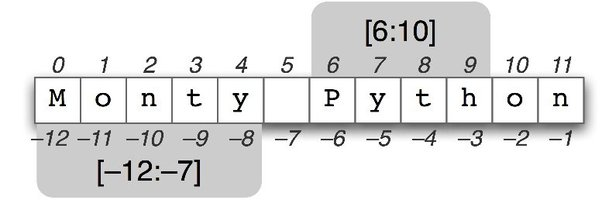

The last position is 768. In our example, if we use -1 as index, it will correspond to position 767 (index 768); that is, the last row. -2 correwsponds to 766 and so on.

In [25]:
# Selects the rows between 1 and 3 (excluded), and the columns between 0 and 3 (exluded)
print('\n\n',diabetes.iloc[1:3, :-3])

# Selects the last row and all the columns
print('\n\n',diabetes.iloc[-1:, :])
# Selects the last 8 rows and all the columns
print('\n\n',diabetes.iloc[-8:, :])



    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI
2            1       85             66             29        0  26.6
3            8      183             64              0        0  23.3


      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
768            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
768                     0.315   23        0  


      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
761            2       88             58             26       16  28.4   
762            9      170             74             31        0  44.0   
763            9       89             62              0        0  22.5   
764           10      101             76             48      180  32.9   
765            2      122             70             27        0  36.8   
766            5      121             72             23      112  26.2   
767            1      126

The fact that it is possible to pass a boolean root to loc (in addition to indexes) allows for easy filtering of a data set by applying conditions on the columns. For example, the following statement selects Pregnancies, Glucose, Age, and BloodPressure for all records with BloodPressure greater than 100.

In [26]:
diabetes.loc[diabetes['BloodPressure'] > 100, ['Pregnancies', 'Glucose', 'Age', 'BloodPressure']]

,Pregnancies,Glucose,Age,BloodPressure
44,9,171,54,110
85,5,137,37,108
107,1,96,27,122
178,0,129,26,110
208,5,162,52,104
363,5,103,65,108
370,1,133,45,102
441,0,189,41,104
550,4,189,37,110
659,11,127,51,106


The following code selects those pregnancies with a blood pressure greater than 100, whose mothers were over 40 years old. The same columns are selected as in the previous case. If instead of an and (**&**) we had needed a logical "or" we would have used the **|** operator.

In [27]:
diabetes.loc[(diabetes['BloodPressure'] > 100) & (diabetes['Age'] >40), ['Pregnancies', 'Glucose', 'Age', 'BloodPressure']]

,Pregnancies,Glucose,Age,BloodPressure
44,9,171,54,110
208,5,162,52,104
363,5,103,65,108
370,1,133,45,102
441,0,189,41,104
659,11,127,51,106
663,8,167,43,106
673,10,68,47,106
692,13,158,44,114


We often work withcategorical data, and we might need to determine the frequency of each category within a column. The **value_counts()** method is ideal for this. For instance, we can count the number of instances where the 'Outcome' is diabetic (1) and non-diabetic (0).

In [28]:
print(diabetes['Outcome'].value_counts())

# Adding the normalize argument returns proportions instead of absolute counts
print('\n\n',diabetes['Outcome'].value_counts(normalize=True))

Outcome
0    500
1    268
Name: count, dtype: int64


 Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


We can also apply value_counts() specifina  a group of columns instead of just a column. Here, for example, we are applying value_counts() with the subset argument, which takes in a list of columns:

In [29]:
diabetes.value_counts(subset=['Pregnancies', 'Outcome'])

,,count
Pregnancies,Outcome,
1,0,106
2,0,84
0,0,73
3,0,48
4,0,45
0,1,38
5,0,36
6,0,34
1,1,29


To aggregate values based on specific column categories, we can use the **groupby()** method followed by a summary function. This groups data by specified columns and calculates summary statistics for each group. For example, to calculate the average of numeric columns for each 'Outcome' category, you can combine .groupby('Outcome') with the .mean() method:

In [30]:
diabetes.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


##Modifying the Dataframe

We can use the **rename** method to change the name of a column. The argument **inplace=True** means that it modifies the original DataFrame, instead of returning a new modified one.

In [46]:
diabetes.rename(columns = {'DiabetesPedigreeFunction':'DPF'}, inplace = True)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


We can add new columns by simply assigning a non-existent column a list of values ​​with a length equal to the number of instances. In this case, the ratio between the glucose and insulin of the patients is added.

In [47]:
#The Glucose_Insulin_Ratio does not exist; it will be created by this command
diabetes['Glucose_Insulin_Ratio'] = diabetes['Glucose']/diabetes['Insulin']
diabetes.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome,Glucose_Insulin_Ratio
0,6,148,72,35,0,33.6,0.627,50,tested_positive,inf
1,1,85,66,29,0,26.6,0.351,31,tested_negative,inf
2,8,183,64,0,0,23.3,0.672,32,tested_positive,inf
3,1,89,66,23,94,28.1,0.167,21,tested_negative,0.946809
4,0,137,40,35,168,43.1,2.288,33,tested_positive,0.815476


Using the **drop** method we can delete columns. The axis= 1 argument indicates that we want to delete the column.

In [48]:
# Remove the glucose and insulin columns from the diabetes dataset
diabetes = diabetes.drop(['Glucose', 'Insulin'], axis=1)
diabetes.head()


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Pregnancies,BloodPressure,SkinThickness,BMI,DPF,Age,Outcome,Glucose_Insulin_Ratio
0,6,72,35,33.6,0.627,50,tested_positive,inf
1,1,66,29,26.6,0.351,31,tested_negative,inf
2,8,64,0,23.3,0.672,32,tested_positive,inf
3,1,66,23,28.1,0.167,21,tested_negative,0.946809
4,0,40,35,43.1,2.288,33,tested_positive,0.815476


In [34]:
diabetes_subset['Age'][2]=310
print(diabetes_subset.head())


diabetes_subset.loc[diabetes_subset['Glucose']==3]=888

print(diabetes_subset.head())

   Glucose  Insulin  Glucose_Insulin_Ratio
2        3        0                    inf
3      183        0                    inf
   Glucose  Insulin  Glucose_Insulin_Ratio
2      888      888                  888.0
3      183        0                    inf


<ipython-input-34-4cb12e328e41>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_subset['Glucose'][2]=3
